In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/drive/MyDrive/CSE 360 - Deep Learning/Datasets/NationalNames.csv")
data.head(3)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003


In [3]:
data.shape

(1825433, 5)

In [4]:
data['Name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [7]:
data['Gender']=data['Gender'].astype('category').cat.codes

In [8]:
df = data.groupby('Name').mean()['Gender'].reset_index()

In [9]:
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [10]:
#convert the float into int 
df['Gender'] = df['Gender'].astype('int')
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


In [11]:
import string
letters = list(string.ascii_lowercase)

In [12]:
vocab = dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [14]:
#create a reverse vocab
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [15]:
def word_to_num():
  for i in range(0,df.shape[0]):
    seq = [vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i] = seq

In [16]:
word_to_num()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [18]:
x = df['Name'].values
y = df['Gender'].values

In [19]:
name_length=[len(x[i]) for i in range(0,df.shape[0])]

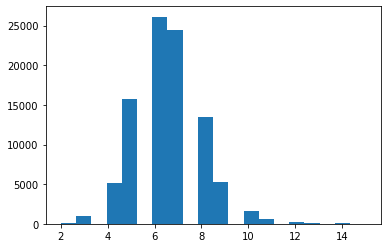

In [20]:
import matplotlib.pyplot as plt
plt.hist(name_length,bins=20)
plt.show()

In [26]:
from keras.preprocessing import sequence
x=sequence.pad_sequences(df['Name'].values,maxlen=10,padding='pre')

In [27]:
df['Name'][0]

[1, 1, 2, 1, 14]

In [28]:
#build the model
from keras.layers import Input,Embedding,Dense,LSTM
from keras.models import Model

vocab_size=len(vocab)+1
input=Input(shape=(10,))
emn=Embedding(input_dim=vocab_size,output_dim=5)(input)
lstm1=LSTM(units=32,return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,activation='sigmoid')(lstm2)
my_model = Model(inputs = input, outputs = out)

In [29]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
my_model.fit(x,y,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
2348/2348 [==============================] - 40s 15ms/step - loss: 0.4383 - accuracy: 0.7878 - val_loss: 0.3859 - val_accuracy: 0.8256
Epoch 2/5
2348/2348 [==============================] - 39s 16ms/step - loss: 0.3886 - accuracy: 0.8182 - val_loss: 0.3758 - val_accuracy: 0.8275
Epoch 3/5
2348/2348 [==============================] - 32s 13ms/step - loss: 0.3788 - accuracy: 0.8231 - val_loss: 0.3729 - val_accuracy: 0.8313
Epoch 4/5
2348/2348 [==============================] - 32s 14ms/step - loss: 0.3689 - accuracy: 0.8285 - val_loss: 0.3631 - val_accuracy: 0.8330
Epoch 5/5
2348/2348 [==============================] - 32s 14ms/step - loss: 0.3586 - accuracy: 0.8338 - val_loss: 0.3599 - val_accuracy: 0.8343


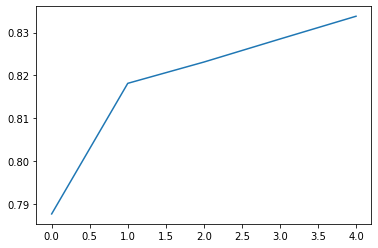

In [36]:
from keras.callbacks import History
acc=my_model.history.history['accuracy']
val_acc=my_model.history.history['val_accuracy']
plt.plot(acc)

In [38]:
name='Tom'
test_name=name.lower()
seq=[vocab[i] for i in test_name]
x_test=sequence.pad_sequences([seq],10)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0, 20, 15, 13]], dtype=int32)

In [39]:
y_pred=my_model.predict(x_test)
y_pred

array([[0.6914998]], dtype=float32)

In [40]:
if(y_pred>0.5):
  print("Male")
else:
  print("Female")

Male
